# SoC zu Beginn

In diesem Notebook wird die Auswirkung des SoC zu Beginn des Ladeprozesses auf den Lastverlauf untersucht.
In den bisherigen Simulationen wurde immer ein SoC von 0 angenommen, was natürlich unrealistisch ist. Da die EVs bei einem niedrigeren SoC eine höhere Ladeleistung zulassen (siehe Ladekurven), besteht die Vermutung, dass die Lastspitzen insgesamt geringer ausfallen, wenn EVs mit einem höheren SoC den Ladevorgang starten.
Als Parkdauer wird weiterhin die Weibull-Verteilung mit den zuvor ermittelten Parametern verwendet

Zunächst wird eine randomisierte **Gleichverteilung** des SoC angenommen. Dafür wird in den Settings angegeben, in welchem Bereich der SoC in % zu Beginn liegen soll. Dann wird über diesen Bereich für jedes ankommende EV ein Wert in diesem Bereich zufällig bestimmt.


soc_begin:  equally_distributed , 48
'Hyundai_IONIQ5_LongRange' charged 35.84 kWh to 97.37 % SOC
soc_begin:  equally_distributed , 52
soc_begin:  equally_distributed , 17
soc_begin:  equally_distributed , 3
'2021_FIAT_500e_Hatchback' charged 31.02 kWh to 90.85 % SOC
'Tesla_ModelY' charged 39.50 kWh to 100.17 % SOC
'Hyundai_KONA_64kWh' charged 37.90 kWh to 62.22 % SOC
soc_begin:  equally_distributed , 33
soc_begin:  equally_distributed , 49
soc_begin:  equally_distributed , 19
soc_begin:  equally_distributed , 63
soc_begin:  equally_distributed , 35
Alle Ladesäulen belegt. Abgewiesene EVs:  1
soc_begin:  equally_distributed , 9
Alle Ladesäulen belegt. Abgewiesene EVs:  2
'Porsche_Taycan' charged 76.40 kWh to 100.80 % SOC
'Porsche_Taycan' charged 62.63 kWh to 100.05 % SOC
soc_begin:  equally_distributed , 62
'Tesla_ModelY' charged 30.43 kWh to 100.11 % SOC
'VW_ID3_Pure_45kWh' charged 20.55 kWh to 97.42 % SOC
soc_begin:  equally_distributed , 31
'Tesla_Model3_LR' charged 42.64 kWh to 100.

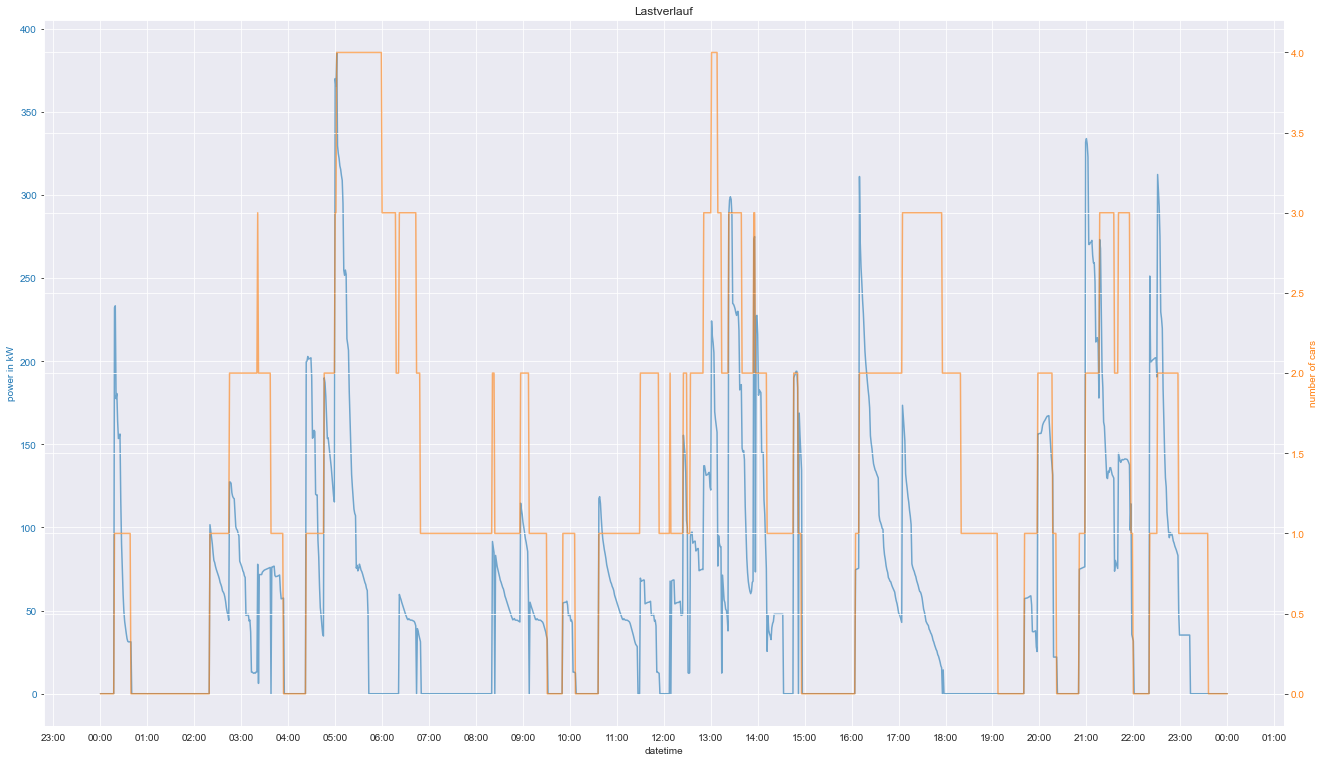

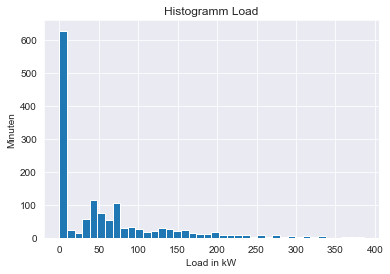

,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,56.903875,1.330326
std,73.122802,1.115162
min,0.000000,0.000000
25%,0.000000,0.000000
50%,37.778343,1.000000
75%,78.544766,2.000000
max,385.698121,4.000000


In [3]:
import importlib
import numpy as np
import model_v2
importlib.reload(model_v2)

df_results_returned_equally_distributed = model_v2.simulation("settings_soc_begin.json")

# soc_begin_global = "equally_distributed"

model_v2.plot(df_results_returned_equally_distributed)
df_results_returned_equally_distributed.describe()

<AxesSubplot:xlabel='power_per_minute', ylabel='Proportion'>

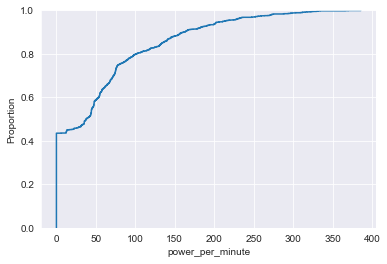

In [4]:
import seaborn as sns
#%matplotlib qt5
# sns.displot(np.asarray(df_results_returned_equally_distributed['power_per_minute']), kind="ecdf")
sns.ecdfplot(data=df_results_returned_equally_distributed, x="power_per_minute")

In [5]:
importlib.reload(model_v2)
model_v2.auswertung(df_results_returned_equally_distributed)

Maximale Last:  385.6981206369764 kWh
Minuten über 60% der maximalen Last (231.42 kWh): 54 Entsprechen  3.75 %
Minuten über 70% der maximalen Last (269.99 kWh): 34 Entsprechen  2.36 %
Minuten über 80% der maximalen Last (308.56 kWh): 16 Entsprechen  1.11 %
Minuten über 90% der maximalen Last (347.13 kWh): 3 Entsprechen  0.21 %
Minuten über 95% der maximalen Last (366.41 kWh): 2 Entsprechen  0.14 %


# Gauss

Als Nächstes wird eine Gauss-Verteilung für den SoC zu Beginn des Ladevorgangs verwendet.


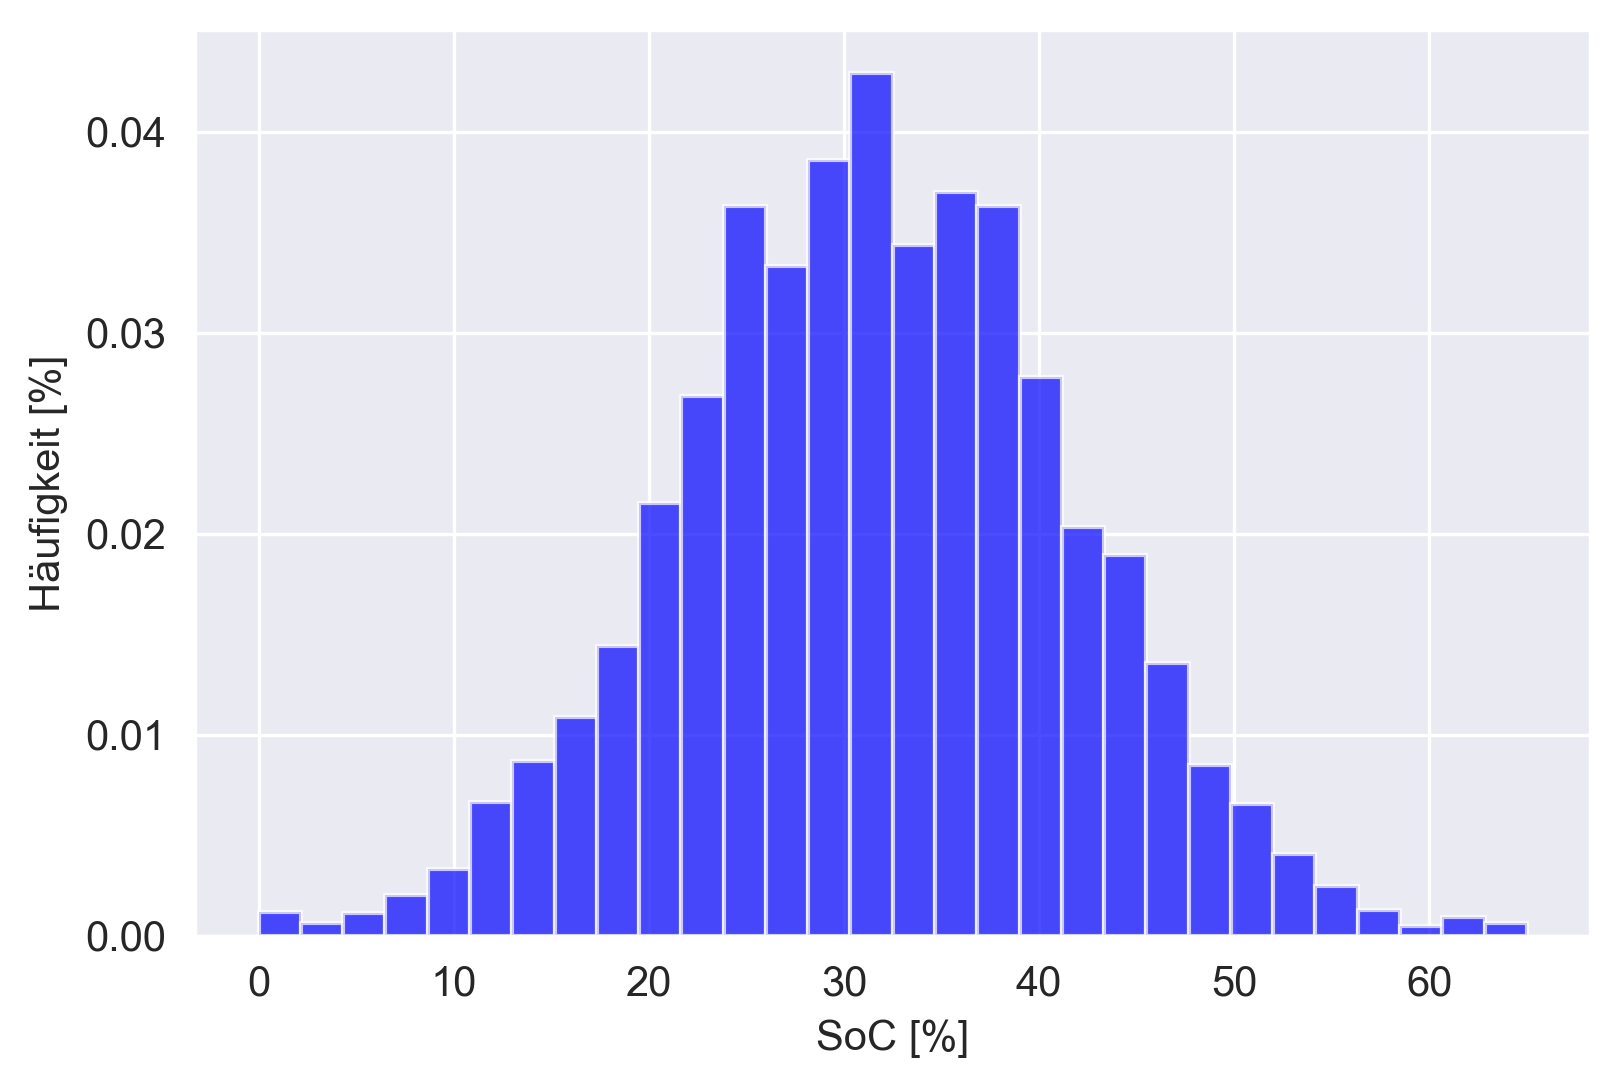

In [6]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib qt5
# Normalverteilung
mu = 32  # Mittelwert
sigma = 10  # Standardabweichung

# Erzeugen einer Liste von Zufallszahlen mit normaler Verteilung
data = np.random.normal(mu, sigma, 5000)

data = np.clip(data, 0, 65)

# Plot
plt.figure(dpi=300)
plt.hist(data, bins=30, density=True, alpha=0.7, color='b')

plt.xlabel('SoC [%]')
plt.ylabel('Häufigkeit [%]')
plt.show()


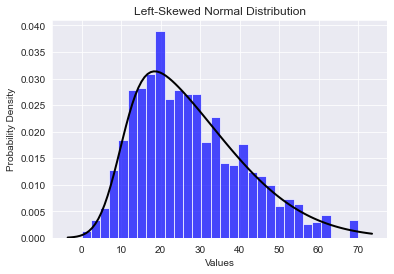

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Parameter für die Verteilung
alpha = 5  # Steuerparameter für die Schiefe der Verteilung
loc = 10    # Lageparameter (Durchschnitt)
scale = 23  # Standardabweichung

# Anzahl der generierten Zufallszahlen
num_samples = 1000

# Generiere Zufallszahlen mit einer "left-skewed normal distribution"
data = skewnorm.rvs(alpha, loc=loc, scale=scale, size=num_samples)

# Begrenze die Zufallszahlen auf den Bereich von 0 bis 70
data = np.clip(data, 0, 70)

# Plot der Verteilung
plt.hist(data, bins=30, density=True, alpha=0.7, color='b')

# Plot der Dichtefunktion
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = skewnorm.pdf(x, alpha, loc=loc, scale=scale)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Left-Skewed Normal Distribution')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.show()


## Initial SoC nach Hertlein

In Hertlein ist beschrieben, mit welchen Parametern die linksverzerrte Verteilungsfunktion für den initialen SoC beschrieben werden kann. Wird von Nutzern ausgegangen, die weder zu Hause, noch auf der Arbeit die Möglichkeit haben ihr EV zu laden, werden die Parameter a=4 und b=4 genutzt.

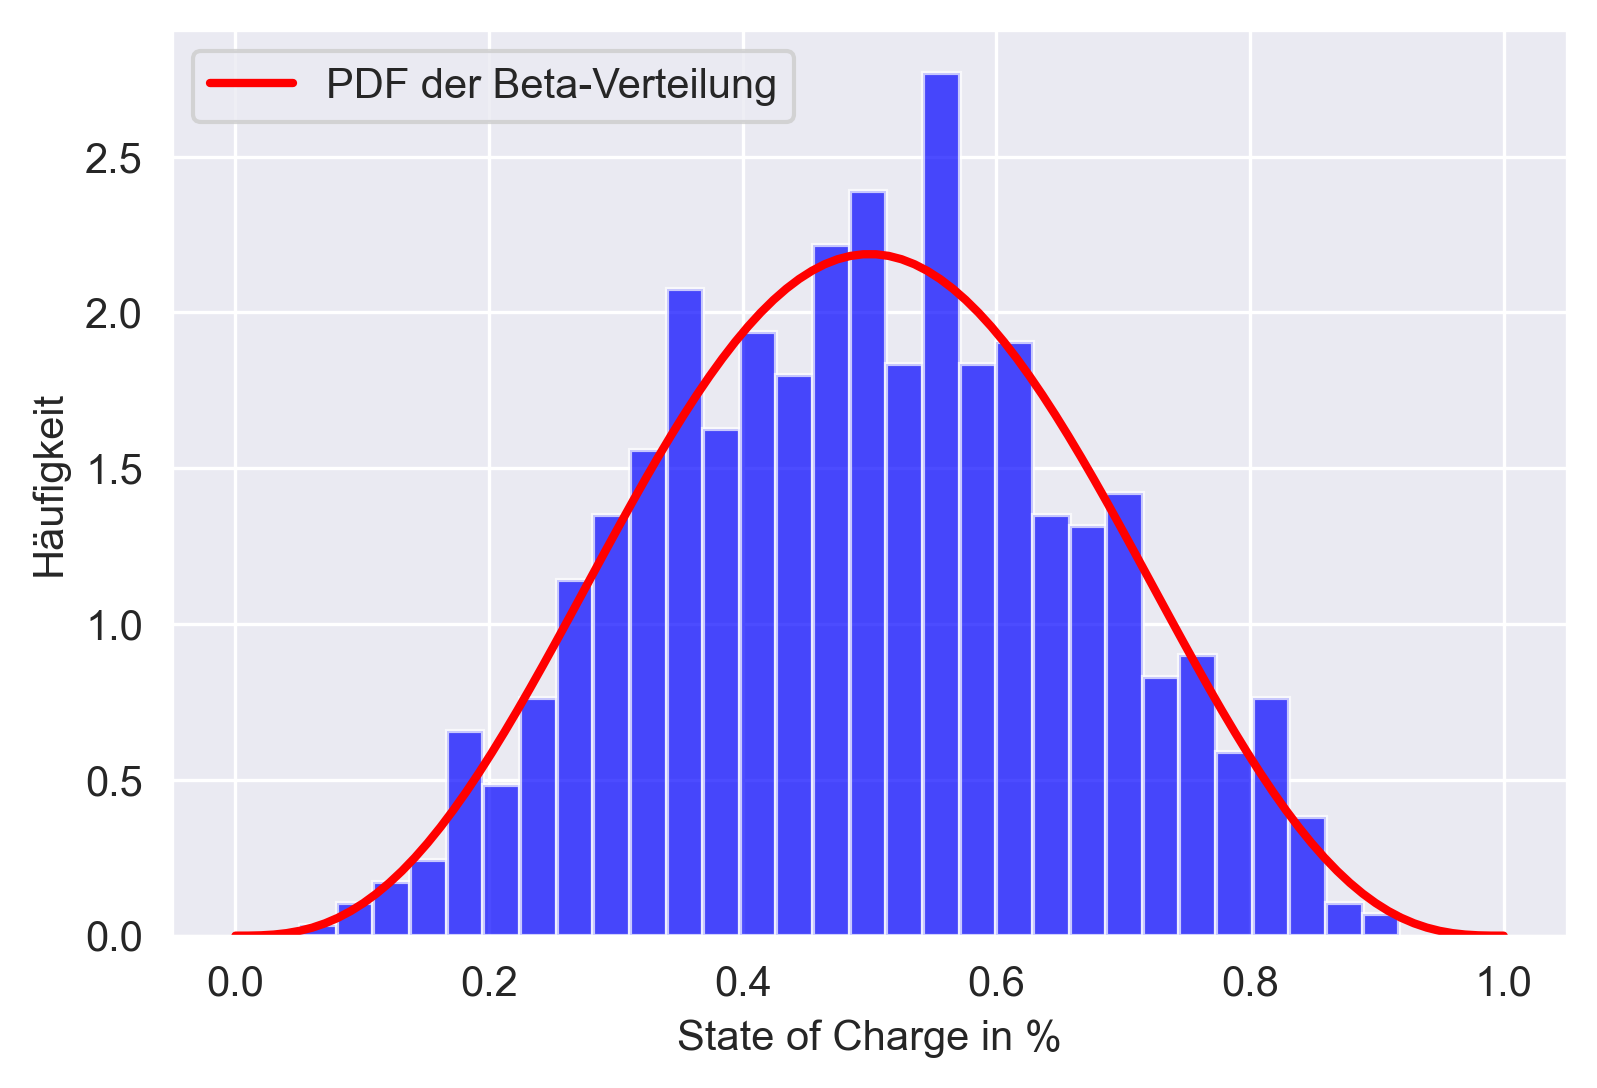

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
#plt.figure(figsize=(9, 6))
plt.figure(dpi=300)
# Parameter für die Beta-Verteilung
a = 4
b = 4

# Erzeugung von Datenpunkten aus der Beta-Verteilung
data = beta.rvs(a, b, size=1000)

# Histogramm plotten
# plt.hist(data, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.hist(data, bins=30, density=True, alpha=0.7, color='b')

# Wahrscheinlichkeitsdichtefunktion (PDF) der Beta-Verteilung plotten
x = np.linspace(0, 1, 100)
y = beta.pdf(x, a, b)
plt.plot(x, y, 'r-', lw=2, label='PDF der Beta-Verteilung')

plt.xlabel('State of Charge in %')
plt.ylabel('Häufigkeit')
plt.legend()

plt.show()
# plt.savefig('filename.png', dpi=300)


# Auswertung initialer SoC nach Hertlein

Wie zu sehen, ergibt sich für a=4 und b=4 bei einer Beta-Verteilung keine Verzerrung und das Ergebnis entspricht einer Normalverteilung. Daher wird in der Simulation mit einer Normalverteilung gearbeitet.

soc_begin:  gauss , [29.39158042]
soc_begin:  gauss , [26.61677977]
soc_begin:  gauss , [36.371103]
soc_begin:  gauss , [30.77957399]
'Tesla_Model3_LR' charged 58.70 kWh to 100.55 % SOC
'VW_ID3_Pure_45kWh' charged 42.98 kWh to 100.72 % SOC
soc_begin:  gauss , [20.35265164]
'Hyundai_IONIQ5_LongRange' charged 46.28 kWh to 100.11 % SOC
soc_begin:  gauss , [17.06752036]
soc_begin:  gauss , [31.33724659]
soc_begin:  gauss , [37.72579004]
Alle Ladesäulen belegt. Abgewiesene EVs:  1
'Hyundai_KONA_64kWh' charged 40.66 kWh to 83.89 % SOC
'Porsche_Taycan' charged 65.25 kWh to 100.64 % SOC
'2021_FIAT_500e_Hatchback' charged 34.26 kWh to 98.65 % SOC
'Hyundai_KONA_64kWh' charged 43.98 kWh to 100.06 % SOC
soc_begin:  gauss , [48.6704765]
soc_begin:  gauss , [38.57460263]
'2021_FIAT_500e_Hatchback' charged 21.00 kWh to 98.67 % SOC
soc_begin:  gauss , [15.2262836]
'Porsche_Taycan' charged 57.98 kWh to 100.65 % SOC
soc_begin:  gauss , [22.69942998]
'Porsche_Taycan' charged 67.88 kWh to 87.90 % SOC
'Tes

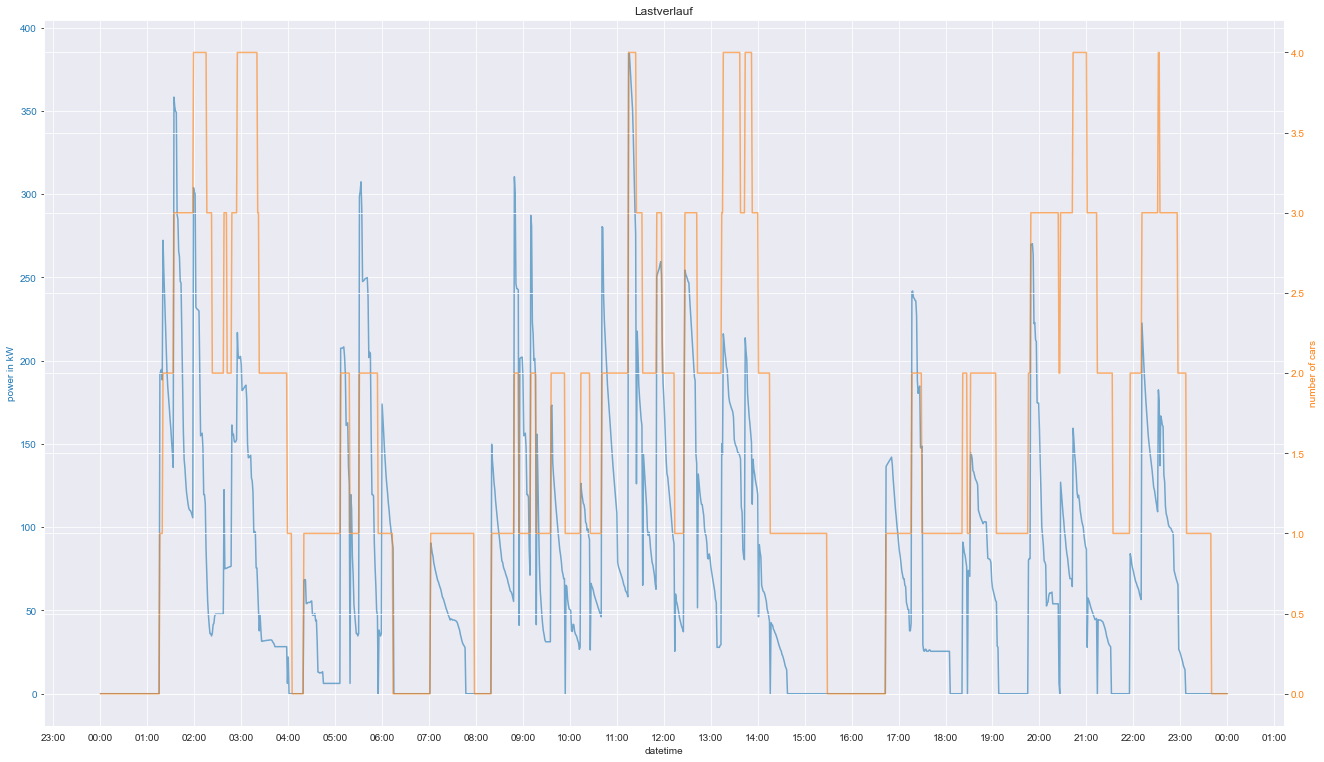

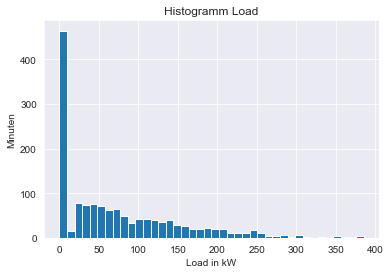

In [9]:
importlib.reload(model_v2)

df_results_returned_gauss = model_v2.simulation("settings_soc_begin.json")
model_v2.plot(df_results_returned_gauss)

<AxesSubplot:xlabel='power_per_minute', ylabel='Proportion'>

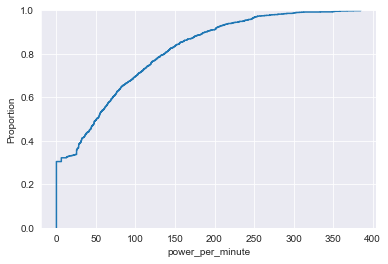

In [10]:
# sns.displot(np.asarray(df_results_returned_gauss['power_per_minute']), kind="ecdf")
sns.ecdfplot(data=df_results_returned_gauss, x="power_per_minute")

Anteil der Minuten, die über einem bestimmten prozentualen Wert der Maximallast liegen

In [11]:
importlib.reload(model_v2)
model_v2.auswertung(df_results_returned_gauss)
df_results_returned_gauss.describe(percentiles=[.5,.75,.9,.95,.98,1])

Maximale Last:  385.04155295425073 kWh
Minuten über 60% der maximalen Last (231.02 kWh): 75 Entsprechen  5.20 %
Minuten über 70% der maximalen Last (269.53 kWh): 33 Entsprechen  2.29 %
Minuten über 80% der maximalen Last (308.03 kWh): 13 Entsprechen  0.90 %
Minuten über 90% der maximalen Last (346.54 kWh): 10 Entsprechen  0.69 %
Minuten über 95% der maximalen Last (365.79 kWh): 4 Entsprechen  0.28 %


,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,72.788564,1.572519
std,78.156088,1.146453
min,0.000000,0.000000
50%,50.849879,1.000000
75%,117.986782,2.000000
90%,187.916308,3.000000
95%,235.866802,4.000000
98%,272.991217,4.000000
100%,385.041553,4.000000


# "Worst-Case" (SOC = 0)

In der folgenden Simulation wird der SOC zu Beginn auf 0 gesetzt. Dies sollte die größten Lastspitzen generieren.

soc_begin:  0 , 0
soc_begin:  0 , 0
'2021_FIAT_500e_Hatchback' charged 36.27 kWh to 86.37 % SOC
'2021_FIAT_500e_Hatchback' charged 32.27 kWh to 76.85 % SOC
soc_begin:  0 , 0
soc_begin:  0 , 0
soc_begin:  0 , 0
'Tesla_Model3_LR' charged 74.78 kWh to 90.64 % SOC
'Hyundai_IONIQ5_LongRange' charged 73.08 kWh to 100.66 % SOC
soc_begin:  0 , 0
'Porsche_Taycan' charged 94.03 kWh to 100.68 % SOC
soc_begin:  0 , 0
'Tesla_ModelY' charged 34.53 kWh to 42.11 % SOC
soc_begin:  0 , 0
'Tesla_Model_SX_LR' charged 24.04 kWh to 24.04 % SOC
'Tesla_Model3_LR' charged 83.01 kWh to 100.62 % SOC
soc_begin:  0 , 0
soc_begin:  0 , 0
'Tesla_Model3_LR' charged 83.01 kWh to 100.62 % SOC
'Hyundai_IONIQ5_LongRange' charged 73.08 kWh to 100.66 % SOC
soc_begin:  0 , 0
'Hyundai_KONA_64kWh' charged 35.42 kWh to 55.35 % SOC
soc_begin:  0 , 0
'Hyundai_KONA_64kWh' charged 55.09 kWh to 86.07 % SOC
soc_begin:  0 , 0
soc_begin:  0 , 0
soc_begin:  0 , 0
'Tesla_Model3_LR' charged 72.27 kWh to 87.60 % SOC
soc_begin:  0 , 0
soc_

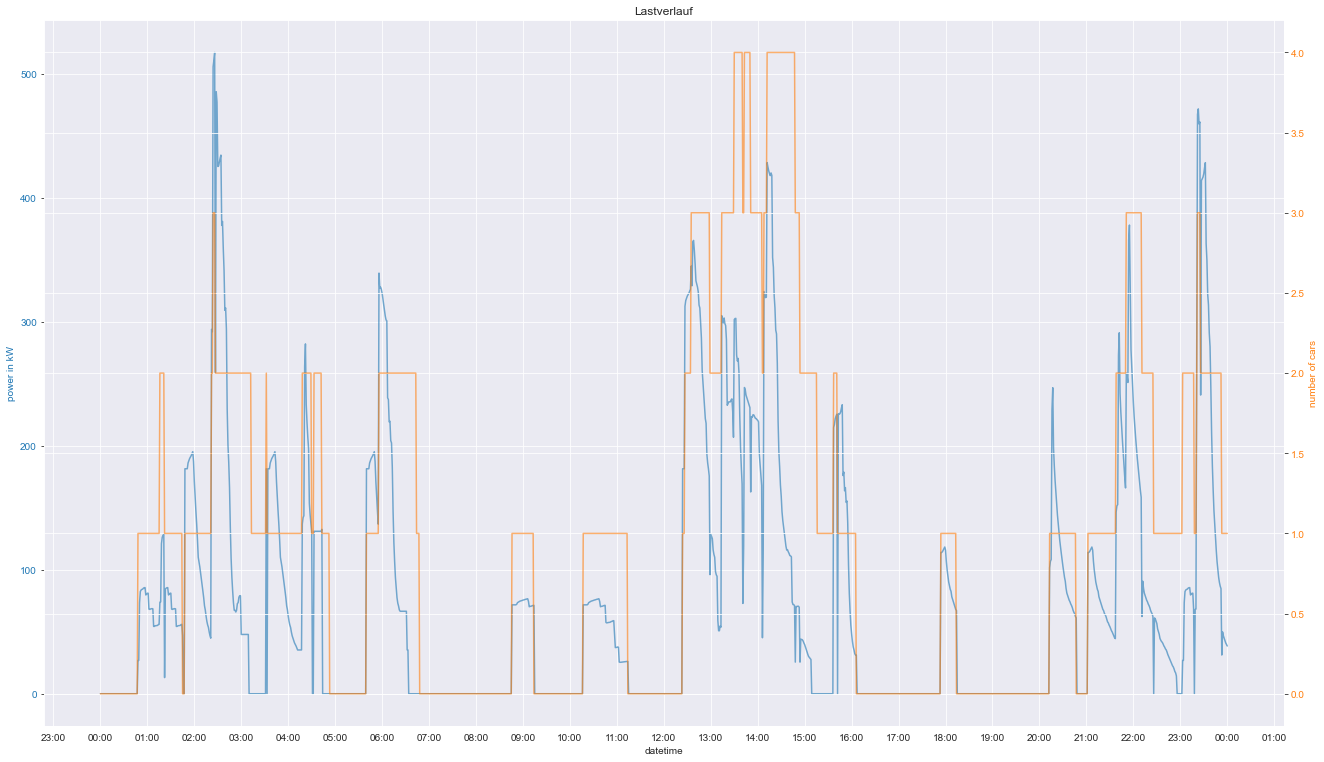

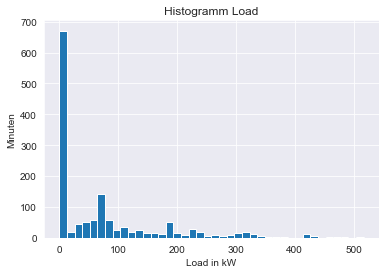

In [12]:
importlib.reload(model_v2)

df_results_returned_SOC_empty = model_v2.simulation("settings_soc_begin.json")
model_v2.plot(df_results_returned_SOC_empty)

In [13]:
importlib.reload(model_v2)
model_v2.auswertung(df_results_returned_SOC_empty)

Maximale Last:  516.983908483116 kWh
Minuten über 60% der maximalen Last (310.19 kWh): 74 Entsprechen  5.14 %
Minuten über 70% der maximalen Last (361.89 kWh): 34 Entsprechen  2.36 %
Minuten über 80% der maximalen Last (413.59 kWh): 27 Entsprechen  1.87 %
Minuten über 90% der maximalen Last (465.29 kWh): 7 Entsprechen  0.49 %
Minuten über 95% der maximalen Last (491.13 kWh): 3 Entsprechen  0.21 %


# Vergleich der verschiedenen SOCs

Nun werden alle 3 Methoden für den SOC zu Beginn miteinander vergleichen:

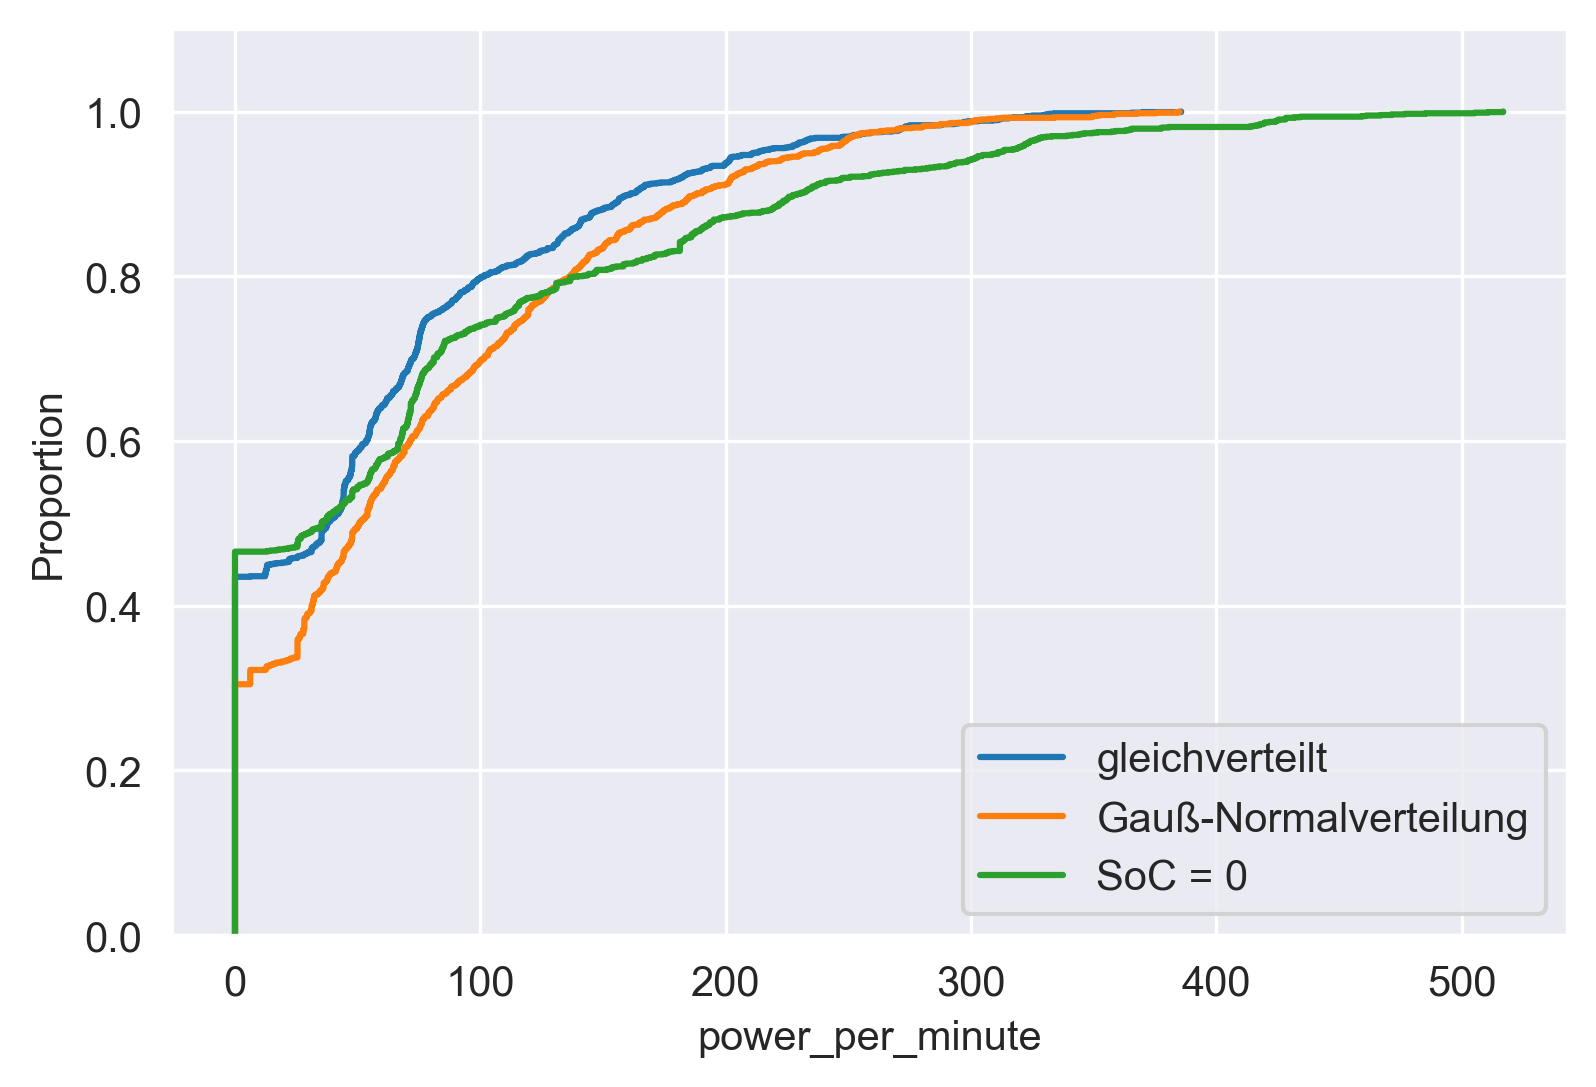

In [18]:
#%matplotlib qt5
plt.figure(dpi=300)
#plt.figure(figsize=(9, 6))

sns.ecdfplot(data=df_results_returned_equally_distributed, x="power_per_minute", label="gleichverteilt")
sns.ecdfplot(data=df_results_returned_gauss, x="power_per_minute", label = "Gauß-Normalverteilung")
sns.ecdfplot(data=df_results_returned_SOC_empty, x="power_per_minute", label = "SoC = 0")

plt.ylim(0, 1.1)
plt.legend()
plt.show()